# Color Threshold, Green Screen

### Import resources

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd '/content/drive/MyDrive/Udacity/Computer Vision Nanodegree/CVND_Exercises/1_1_Image_Representation'

/content/drive/MyDrive/Udacity/Computer Vision Nanodegree/CVND_Exercises/1_1_Image_Representation


In [6]:
# Read in the image
image = mpimg.imread('images/car_green_screen.jpg')

# Print out the image dimensions (height, width, and depth (color))
print('Image dimensions:', image.shape)


Image dimensions: (450, 660, 3)


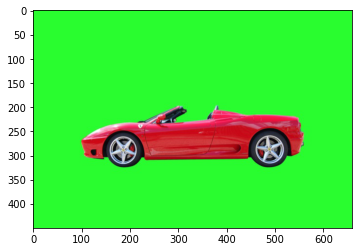

In [7]:
# Display the image
plt.imshow(image)

In [11]:
# checking for the green hexa value
image[400, 100]

array([ 41, 253,  47], dtype=uint8)

### Define the color threshold

In [17]:
## COMPLETED: Define our color selection boundaries in RGB values
lower_green = np.array([10,220,10]) 
upper_green = np.array([70,255,70])


### Create a mask

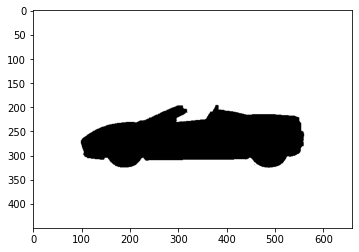

In [18]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

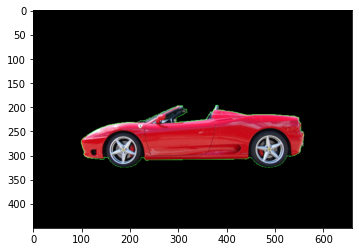

In [19]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)


### Mask and add a background image

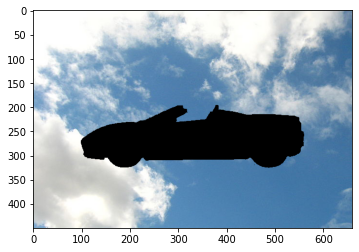

In [32]:
# Load in a background image, and convert it to RGB 
background_image = mpimg.imread('images/sky.jpg')

## COMPLETED: Crop it or resize the background to be the right size (450x660)
bg_copy = np.copy(background_image)
crop_bg = bg_copy[0:450, 0:660]

## COMPLETED: Mask the cropped background so that the car area is blocked
# Hint mask the opposite area of the previous image
crop_bg[mask == 0] = [0, 0, 0]

## COMPLETED: Display the background and make sure
plt.imshow(crop_bg) 


### Create a complete image

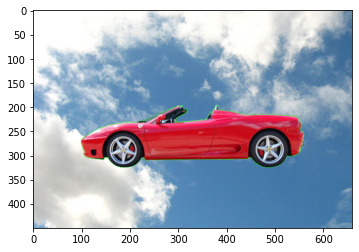

In [33]:
## COMPLETED: Add the two images together to create a complete image!
# complete_image = masked_image + crop_background
complete_image = masked_image + crop_bg

plt.imshow(complete_image)